In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (accuracy_score,recall_score,precision_score,confusion_matrix)

In [51]:
iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Splitting data into train and test

Labeling only two features [Virginica as True] and [Non-Verginica as false]

In [55]:
X = iris.data
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Training a logistic regression model

In [56]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
#Predicting the probability of the test data points
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba

array([[7.96014328e-01, 2.03985672e-01],
       [9.99991933e-01, 8.06676033e-06],
       [1.68962752e-03, 9.98310372e-01],
       [7.88230647e-01, 2.11769353e-01],
       [7.19220879e-01, 2.80779121e-01],
       [9.99992178e-01, 7.82176002e-06],
       [9.82501228e-01, 1.74987722e-02],
       [1.80900927e-01, 8.19099073e-01],
       [7.37507916e-01, 2.62492084e-01],
       [9.67192891e-01, 3.28071088e-02],
       [2.69093660e-01, 7.30906340e-01],
       [9.99995049e-01, 4.95087673e-06],
       [9.99997229e-01, 2.77120685e-06],
       [9.99994040e-01, 5.96027498e-06],
       [9.99994176e-01, 5.82372170e-06],
       [7.06574537e-01, 2.93425463e-01],
       [3.18271628e-02, 9.68172837e-01],
       [9.68061654e-01, 3.19383458e-02],
       [8.26116771e-01, 1.73883229e-01],
       [4.70954543e-02, 9.52904546e-01],
       [9.99990195e-01, 9.80534366e-06],
       [4.26347933e-01, 5.73652067e-01],
       [9.99988102e-01, 1.18976087e-05],
       [5.70537449e-02, 9.42946255e-01],
       [2.344674

In [58]:
#Printing the actual predictions and the probability of a random test data point
print(f'Actual outcome {y_test[1]}')
print(f'Predicted outcome probabilities {y_pred_proba[1]}')

Actual outcome False
Predicted outcome probabilities [9.99991933e-01 8.06676033e-06]


Which means the probability of being the second data point as non virginica is 99.999% and being virginca is close to 0.001 which explains the outcome "False"

In [59]:
#Predicting the outcome of the test data points
y_pred = log_reg.predict(X_test)
y_pred


array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False])

### To Evaluate performance of logistic regression, we can use a confusion matrix which will provide us with four values:
1. True Positives: Number of outcomes predicted as True are actually True
2. False Positives: Number of outcomes predicted as True are actually False
3. True Negavites: Number of outcomes predicted as False that are acually False
4. False Negatives: Number of outcomes predicted as False that are acually True

[[26  0]
 [ 0 12]]


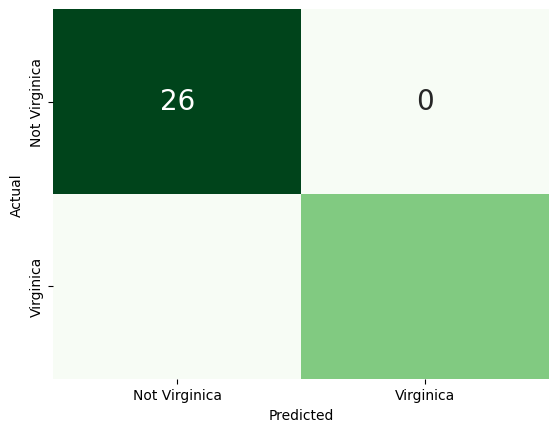

In [71]:
#Confusion matrix
confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

#Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d', cbar=False, xticklabels=['Not Virginica', 'Virginica'], yticklabels=['Not Virginica', 'Virginica'], annot_kws={"size": 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Which gives us the 4 values


TP=26     FN=0


FP=0      TN=12

From definition of precision:  $Precision = \frac{True \ Positives}{True \ Positives + False \ Positives}$ which gives the value of precision as 1

and from definition of recall: $Recall = \frac{True \ Positives}{True \ Positives + False \ Negatives}$ which gives us the value after manual calculation as 1.

In [17]:
#Printing the precision, recall and accuracy scores
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')


Precision score: 1.0
Recall score: 1.0
Accuracy score: 1.0


Which Confirms that the model is 100% accurate and precise and doesnt miss or get wrong in any data instance

As Dataset is balanced, having 50 datapoints for each class this accuracy and precision may be due to relatively small dataset as it contains only 150 datapoints may be the model is complex for this dataset and overfitted due to which it covers all the datapoints and made possible this 100% accuracy and precision 